In [29]:
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
from plotly.subplots import make_subplots

In [30]:
xls = pd.ExcelFile('df_radon_combined.xlsx')

xls.sheet_names 

df = {}
for num in xls.sheet_names[2:]:
    df[num] = pd.read_excel(xls, num) 
    print(df[num].shape) 

#remove these indexes
devices = ['1', '2', '5', '9', '17', '23', '27', '28', '36', '44', '48']
for key in list(df):
    if key in devices:
        del df[key]

for key in df:
    print(key)
    print(df[key].shape)
    df[key]['SyncDate'] = pd.to_datetime(df[key]['SyncDate'])
    print(f"{df[key]['SyncDate'].min()} - {df[key]['SyncDate'].max()}")
    df[key].sort_values(by='SyncDate', ascending=True, inplace=True)
    df[key]['SyncDate'] = df[key]['SyncDate'].dt.floor('H')
    df[key] = df[key].resample('H', on = 'SyncDate').mean()
    df[key] = df[key].interpolate(method='linear', limit_direction='both')
    start_time = pd.to_datetime('2022-05-11T18:29:00.000000000')
    end_time = pd.to_datetime('2023-06-06T12:00:00.000000000')
    df[key] = df[key][(df[key].index >= start_time) & (df[key].index <= end_time)]
    print(f"{df[key].index.min()} - {df[key].index.max()}")

(7546, 6)
(7365, 6)
(8993, 6)
(9182, 6)
(9234, 6)
(7539, 6)
(8937, 6)
(7715, 6)
(9234, 6)
(8940, 6)
(9332, 6)
(8726, 6)
(9063, 6)
(6082, 6)
(8957, 6)
(9092, 6)
(9218, 6)
(10739, 6)
(8909, 6)
(7703, 6)
(9136, 6)
(8175, 6)
(7176, 6)
(8803, 6)
(9101, 6)
(8957, 6)
(8964, 6)
(9058, 6)
(9050, 6)
(6916, 6)
(9001, 6)
(9035, 6)
(8106, 6)
(8999, 6)
(1579, 6)
(9320, 6)
(9101, 6)
(7524, 6)
(9098, 6)
(8960, 6)
3
(8993, 6)
2022-05-08 00:16:30 - 2023-06-06 12:25:38
2022-05-11 19:00:00 - 2023-06-06 12:00:00
4
(9182, 6)
2022-05-08 00:17:23 - 2023-06-06 12:26:06
2022-05-11 19:00:00 - 2023-06-06 12:00:00
7
(7539, 6)
2022-04-01 10:18:57 - 2023-06-06 12:30:25
2022-05-11 19:00:00 - 2023-06-06 12:00:00
8
(8937, 6)
2022-04-04 18:52:46 - 2023-06-06 12:27:12
2022-05-11 19:00:00 - 2023-06-06 12:00:00
10
(9234, 6)
2022-05-08 00:56:00 - 2023-06-06 23:02:00
2022-05-11 19:00:00 - 2023-06-06 12:00:00
11
(8940, 6)
2022-05-08 00:50:01 - 2023-06-07 12:13:32
2022-05-11 19:00:00 - 2023-06-06 12:00:00
13
(9332, 6)
2022-05-

In [31]:
df_radon = pd.DataFrame(index=df['50'].index)
for key in df:
    print(key)
    df_radon[f'Radon_{key}'] = df[key]['Radon']

3
4
7
8
10
11
13
15
16
18
19
20
21
22
25
26
29
30
31
32
35
37
39
41
43
45
46
49
50


In [32]:
df_radon

,Radon_3,Radon_4,Radon_7,Radon_8,Radon_10,Radon_11,Radon_13,Radon_15,Radon_16,Radon_18,...,Radon_32,Radon_35,Radon_37,Radon_39,Radon_41,Radon_43,Radon_45,Radon_46,Radon_49,Radon_50
SyncDate,,,,,,,,,,,,,,,,,,,,,
2022-05-11 19:00:00,1.20,1.60,0.304717,6.80,1.300000,10.00,3.700000,24.600000,0.6,1.300000,...,2.80,1.80,0.70,0.5,1.20,10.80,5.6,0.90,1.20,6.90
2022-05-11 20:00:00,1.20,1.60,0.305031,6.80,1.400000,10.00,3.600000,24.200000,0.6,1.300000,...,2.80,1.80,0.60,0.5,1.30,10.20,5.7,0.90,1.10,8.20
2022-05-11 21:00:00,1.10,1.70,0.305346,6.80,1.500000,10.20,3.600000,24.200000,0.6,1.200000,...,2.70,1.90,0.60,0.5,1.20,10.30,5.6,1.00,1.00,9.60
2022-05-11 22:00:00,0.90,1.80,0.305660,6.60,1.600000,10.20,3.600000,24.000000,0.5,1.200000,...,2.60,1.90,0.70,0.5,1.20,10.20,5.2,1.00,0.90,8.70
2022-05-11 23:00:00,0.90,1.80,0.305975,6.60,1.500000,10.00,3.300000,23.900000,0.5,1.000000,...,2.50,2.00,0.70,0.6,1.20,10.00,4.9,1.00,0.90,8.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06 08:00:00,14.90,37.60,1.500000,4.85,1.400000,16.10,7.200000,0.031963,1.0,1.200000,...,5.15,2.30,6.25,2.1,0.70,6.35,11.7,30.95,2.45,34.25
2023-06-06 09:00:00,13.65,39.45,1.500000,4.60,1.400000,15.55,8.200000,0.027397,1.0,1.100000,...,5.15,2.30,6.05,2.1,0.70,6.20,11.3,30.80,2.35,33.40
2023-06-06 10:00:00,13.30,38.35,1.400000,4.25,1.300000,14.55,8.900000,0.022831,1.0,1.100000,...,4.90,2.25,6.05,2.1,0.70,6.50,10.8,30.40,2.35,32.60


In [33]:
import plotly.graph_objects as go
import plotly.io as pio

sensors = ['Radon_45', 'Radon_13']  # List of sensor names

traces = [go.Scatter(x=df_radon.index, y=df_radon[sensor], mode='lines', name=sensor) for sensor in sensors]

# Create layout with dropdown menu
layout = go.Layout(
    title='',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Radon Concentration (pCi/L)'),
    legend=dict(x=1, y=1, xanchor='right', yanchor='top'),  # Set the legend position to the top right corner
)

# Create figure with initial data and layout
fig = go.Figure(data=traces, layout=layout)

# # Add legend annotations programmatically
# for i, sensor in enumerate(sensors):
#     fig.add_annotation(
#         x=0.95,
#         y=0.95 - i*0.05,
#         xref='paper',
#         yref='paper',
#         text=sensor,
#         showarrow=False,
#         font=dict(
#             size=12,
#             color='black'
#         ),
#         bgcolor='rgba(255, 255, 255, 0.7)',  # Set the background color of the legend
#         bordercolor='rgba(0, 0, 0, 0.7)',  # Set the border color of the legend
#         borderwidth=1,  # Set the border width of the legend
#         borderpad=4,  # Set the padding around the legend text
#     )

# Show the chart
pio.show(fig)



In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
values = sc.fit_transform(df_radon)
df_radon_scaled = pd.DataFrame(values, columns=df_radon.columns)
df_radon_scaled

,Radon_3,Radon_4,Radon_7,Radon_8,Radon_10,Radon_11,Radon_13,Radon_15,Radon_16,Radon_18,...,Radon_32,Radon_35,Radon_37,Radon_39,Radon_41,Radon_43,Radon_45,Radon_46,Radon_49,Radon_50
0,0.007335,0.005073,0.009206,0.097701,0.203125,0.052192,0.025974,0.352436,0.060606,0.117117,...,0.033654,0.066421,0.016997,0.041322,0.033149,0.165899,0.031567,0.003809,0.054299,0.023793
1,0.007335,0.005073,0.009215,0.097701,0.218750,0.052192,0.025253,0.346705,0.060606,0.117117,...,0.033654,0.066421,0.014164,0.041322,0.035912,0.156682,0.032131,0.003809,0.049774,0.028409
2,0.006724,0.005390,0.009225,0.097701,0.234375,0.053236,0.025253,0.346705,0.060606,0.108108,...,0.032452,0.070111,0.014164,0.041322,0.033149,0.158218,0.031567,0.004232,0.045249,0.033381
3,0.005501,0.005707,0.009234,0.094828,0.250000,0.053236,0.025253,0.343840,0.050505,0.108108,...,0.031250,0.070111,0.016997,0.041322,0.033149,0.156682,0.029312,0.004232,0.040724,0.030185
4,0.005501,0.005707,0.009244,0.094828,0.234375,0.052192,0.023088,0.342407,0.050505,0.090090,...,0.030048,0.073801,0.016997,0.049587,0.033149,0.153610,0.027621,0.004232,0.040724,0.030895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,0.091076,0.119214,0.045317,0.069684,0.218750,0.084029,0.051227,0.000458,0.101010,0.108108,...,0.061899,0.084871,0.174221,0.173554,0.019337,0.097542,0.065953,0.130978,0.110860,0.120916
9374,0.083435,0.125079,0.045317,0.066092,0.218750,0.081159,0.058442,0.000393,0.101010,0.099099,...,0.061899,0.084871,0.168555,0.173554,0.019337,0.095238,0.063698,0.130343,0.106335,0.117898
9375,0.081296,0.121592,0.042296,0.061063,0.203125,0.075939,0.063492,0.000327,0.101010,0.099099,...,0.058894,0.083026,0.168555,0.173554,0.019337,0.099846,0.060879,0.128650,0.106335,0.115057
9376,0.069071,0.115092,0.045317,0.038793,0.208807,0.056367,0.064007,0.000262,0.101010,0.100386,...,0.048077,0.070111,0.133144,0.173554,0.020718,0.096774,0.040023,0.097334,0.104072,0.086293


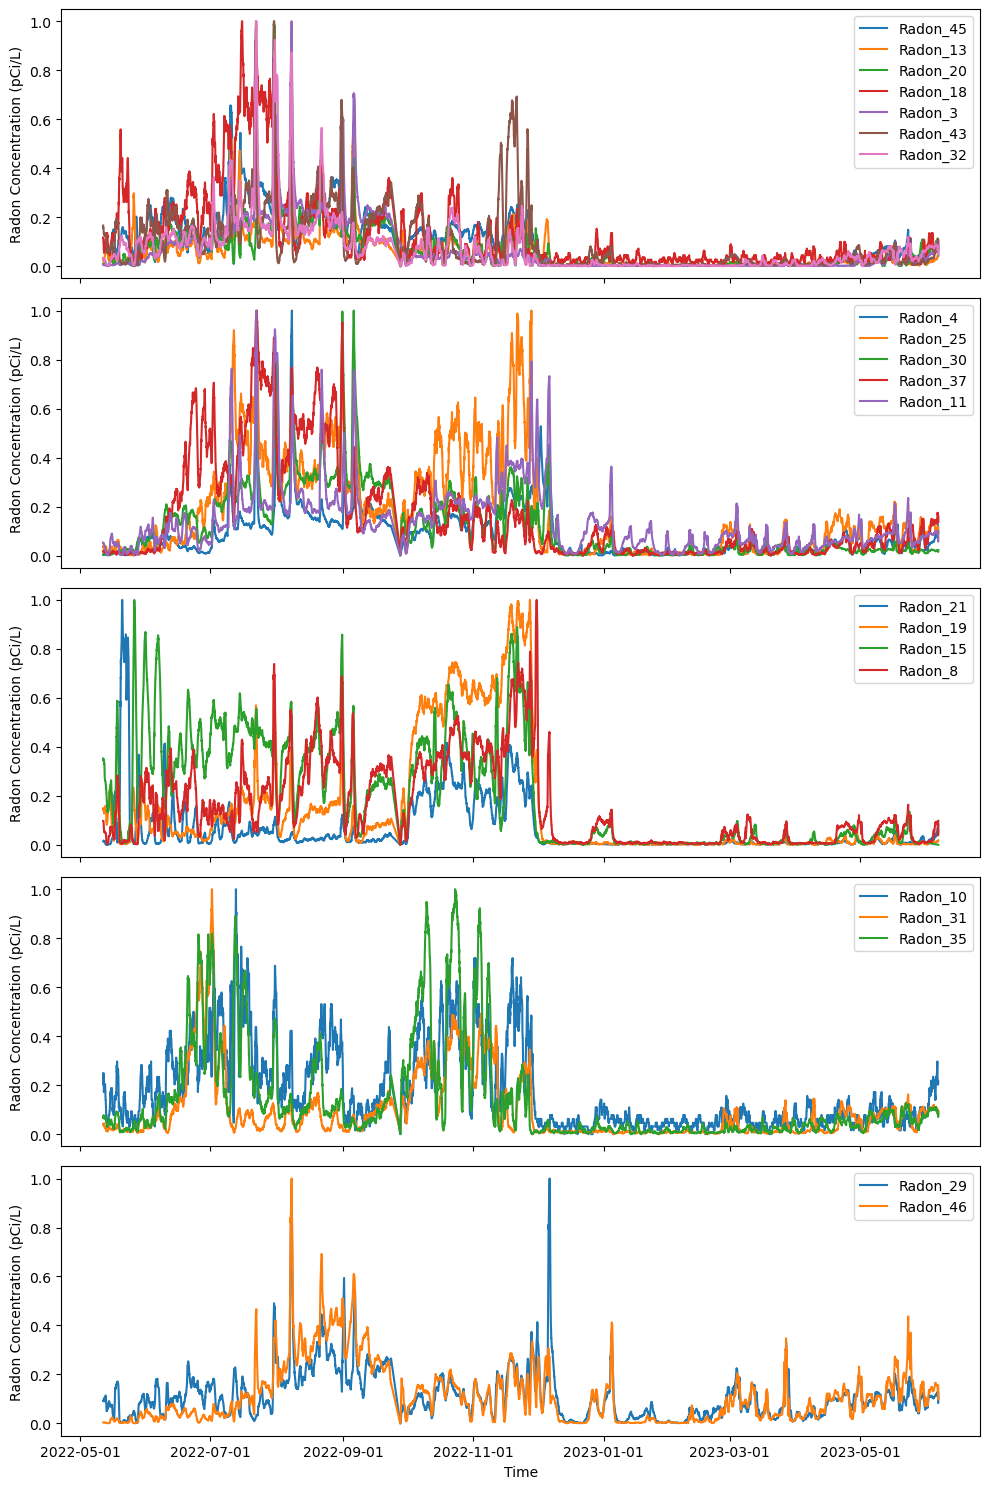

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sensors_list_1 = ['Radon_45', 'Radon_13', 'Radon_20', 'Radon_18', 'Radon_3', 'Radon_43', 'Radon_32']  # Insert your list of sensor names here
sensors_list_2 = ['Radon_4', 'Radon_25', 'Radon_30', 'Radon_37', 'Radon_11']  # Insert your list of sensor names here
sensors_list_3 = ['Radon_21', 'Radon_19', 'Radon_15', 'Radon_8']  # Insert your list of sensor names here
sensors_list_4 = ['Radon_10', 'Radon_31', 'Radon_35']
sensors_list_5 = ['Radon_29', 'Radon_46']
sensors_lists = [sensors_list_1, sensors_list_2, sensors_list_3, sensors_list_4, sensors_list_5]


fig, axes = plt.subplots(nrows=len(sensors_lists), ncols=1, sharex=True, sharey=True, figsize=(10, 15))

for i, sensors in enumerate(sensors_lists):
    ax = axes[i]
    for sensor in sensors:
        ax.plot(df_radon.index, df_radon_scaled[sensor], label=sensor)
    ax.legend(loc='upper right')
    ax.set_ylabel('Radon Concentration (pCi/L)')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xlabel('Time')
plt.subplots_adjust(top=0.95)  # Adjust the space at the top to fit the suptitle
plt.tight_layout()
plt.savefig('louvain_device_plots.png')
plt.show()

